# Esercitazione 2

## Calcolo dell'integrale

Per lo svolgimento della prima richiesta utilizzo la classe per le medie a blocchi che ho introdotto la lezione precedente. Il calcolo di un integrale di una funzione $f(x)$ con distribuzione uniforme è semplice, infatti corrisponde solamente a generare numeri casuali uniformi $x_i$ e poi fare la media di $f(x)$ valuatata su questi numeri casuali. Il metodo *CalcolaBlocco* fa esattamente questo, genera dei numeri casuali e calcola la funzione valutata su questi punti.

Il caso con una distribuzione non uniforme è più complesso perchè devo riuscire ad invertire la formula della cumulativa per generare numeri casuali secondo la distribuzione voluta. Tale complessità limita la scelta della distribuzione, di conseguenza ho considerato una funzione lineare $p(x) = 2(1-x)$ con $x \in [0, 1]$. La sua cumulativa è data da $P(x) = 2x - x^2$ e invertendola si ottiene la legge per generare punti linearmente $F(u) = 1 - \sqrt{1-u}$, dove $u$ è una variabile distribuita uniformemente in $[0, 1]$. Conoscendo la $F(u)$ calcolare l'integrale non è più complesso del caso uniforme, infatti devo soltanto generare $u \in [0, 1]$, calcolare $x = F(u)$ e infine $f(x)/p(x)$. Facendo la media su tanti valori ottengo il valore dell'integrale. Il procedimento è quindi diventato analogo a quella della distribuzione uniforme con l'eccezione che l'integranda ora deve essere divisa per la distribuzione di probabilità.

Per entrambe le distribuzioni utilizzo $100$ blocchi, ciascuno con $10^5$ valutazioni della $f(x) = \frac{\pi}{2}cos(\frac{\pi x}{2})$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

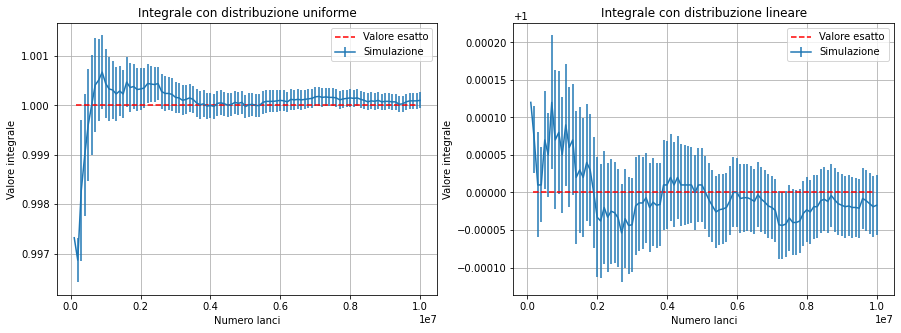

In [2]:
# Carico i dati da file
x_unif, unif, unif_err = np.loadtxt("../Esercizio2/distribuzione_uniforme.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
x_lin, lin, lin_err = np.loadtxt("../Esercizio2/distribuzione_lineare.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

# Prepara due immagini
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Grafico per la distribuzione uniforme
ax1.errorbar(x_unif, unif, yerr = unif_err, label = "Simulazione")
ax1.axhline(y = 1, xmin = 0.05, xmax = 0.95, color = 'red', ls = "--", label = "Valore esatto")
ax1.set_xlabel('Numero lanci')
ax1.set_ylabel('Valore integrale')
ax1.set_title("Integrale con distribuzione uniforme")
ax1.legend()
ax1.grid(True)

# Grafico per la distribuzione lineare
ax2.errorbar(x_lin, lin, yerr = lin_err, label = "Simulazione")
ax2.axhline(y = 1, xmin = 0.05, xmax = 0.95, color = 'red', ls = "--", label = "Valore esatto")
ax2.set_xlabel('Numero lanci')
ax2.set_ylabel('Valore integrale')
ax2.set_title("Integrale con distribuzione lineare")
ax2.legend()
ax2.grid(True)

L'integrale calcolato con entrambi i metodi tende al valore esatto, però si vede che l'incertezza ottenuta con la distribuzione lineare è minore ($2.5$ $10^{-4}$ per uniforme e $10^{-4}$ per la lineare). Questo è dovuto all'importance sampling, ovvero la distribuzione lineare scelta è più simile alla funzione di cui vogliamo calcolare l'integrale e quindi otteniamo un'incertezza minore.

## Random Walk

Per questo secondo esercizio ho utilizzato una classe leggermente diversa da quella già descritta per la media a blocchi. La differenza rispetto alla classe precendente è che adesso non voglio avere una variabile per le somme e per le somme quadratiche, ma voglio degli array. In questo modo facendo una sola simulazione di un random walk di lunghezza $100$, ottengo una misura per ogni Random Walk con lunghezza tra $1$ e $100$, questo riduce drasticamente il tempo necessario per fare la simulazione. Di conseguenza per tenere separati le somme, somme quadratiche e altro per ogni diversa lunghezza di del Random Walk ho bisogno di array. Il resto della classe è analogo alla classe precedente. Adesso però utilizzerò il metodo *Results* soltanto alla fine perchè non sono interessato a come varia la distanza in funzione del numero di blocchi.

Il metodo *CalcolaBlocco* ottiene il valore della radice della distanza quadradica media. Per fare questo per ogni Random Walk parte dall'origine e poi per $100$ volte

- Genera dei numeri casuali per decidere in che direzione muoversi
- Applica lo spostamento e calcola la distanza al quadrato,
- Alla fine del blocco calcola la media e ne fa la radice
    
Questo procedimento si applica sia al caso discetro che al caso continuo. Per le seguenti simulazioni ho usato uno step di lunghezza $2$, $100$ blocchi ognuno con $10^4$ Random Walk. Poichè la radice della distanza quadratica media di un random walk segue la legge $\sqrt{<r>^2_{RW}} = a \sqrt{N}$ dove $a$ è il passo del reticolo e $N$ la lunghezza del random walk è conveniente fare il grafico con la differenza del risulstato teorico con quello ottenuto tramite simulazione.

In [3]:
from scipy.optimize import curve_fit

def potenza(x,a,b):
    return a * (x**b);

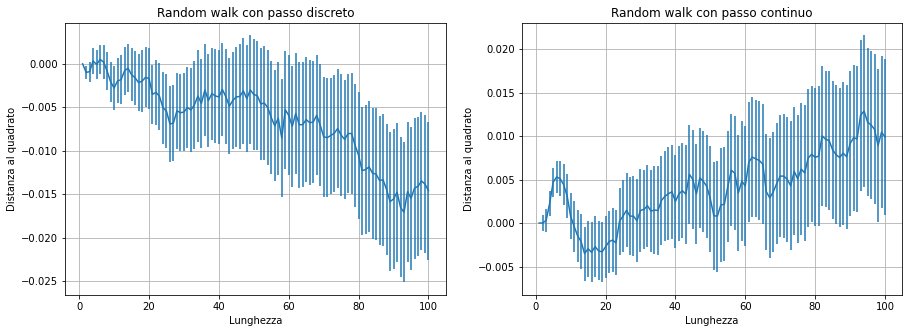

In [43]:
# Carica i dati da file
x_discr, discr, discr_err = np.loadtxt("../Esercizio2/reticolo.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
x_cont, cont, cont_err = np.loadtxt("../Esercizio2/isotropo.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

# Prepara due immagini
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.errorbar(x_discr, discr - 2 * x_discr**0.5, yerr = discr_err)
ax1.set_xlabel('Lunghezza')
ax1.set_ylabel('Distanza al quadrato')
ax1.set_title("Random walk con passo discreto")
ax1.grid(True)

ax2.errorbar(x_cont, cont - 2 * x_cont**0.5, yerr = cont_err)
ax2.set_xlabel('Lunghezza')
ax2.set_ylabel('Distanza al quadrato')
ax2.set_title("Random walk con passo continuo")
ax2.grid(True)

In [46]:
# Fai il fit con una legge a potenza
p_optD, p_covD = curve_fit(potenza, x_discr[1:], discr[1:], sigma = discr_err[1:])
p_optC, p_covC = curve_fit(potenza, x_cont[1:], cont[1:], sigma = cont_err[1:])

# Controlla i parametri ottenuti
print("Parametri per discreto [a,b] =", p_optD)
print("Incertezza dei parametri per discreto=", np.sqrt(np.diagonal(p_covD)))
print()
print("Parametri per continuo [a,b] =", p_optC)
print("Incertezza dei parametri per continuo =", np.sqrt(np.diagonal(p_covC)))

Parametri per discreto [a,b] = [2.00024291 0.49984807]
Incertezza dei parametri per discreto= [1.22979099e-04 1.66246519e-05]

Parametri per continuo [a,b] = [2.00000866 0.50007166]
Incertezza dei parametri per continuo = [2.51311911e-04 3.38174733e-05]


Per il calcolo del fit ho utilizzato le incertezze sui valori che ho ottenuto con la simulazione. Facendo in questo modo devo escludere il primo punto perchè questo ha una incertezza nulla. Avrei anche potuto dare al primo punto una incertezza molto piccola, ma ho notato che questo modifica in modo sostanziale i valori del fit dando risultati con poco significato.

Dai due grafici si vede che entrambe le simulazioni sono in accordo con il valore atteso infatti tutti i valori trovati con la simulazione distano meno di due deviazioni standard dal valore teorico. Guardando i parametri ottenuti con il fit si nota che il coefficiente della legge a potenza è in accordo con quello teorico mentre l'esponente (essendo in ogni caso molto vicino al valore teorico) dista diverse sigma dal valore teorico. Questo è dovuto a fluttuazioni casuali della simulazione che portano a un risultato leggermente diverso calcolando i parametri del fit. 

Il fatto che il fit non ottenga un esponente compatibile con quello teorico è anche dovuto al fatto che è presente una correlazione tra i risultati dei Random Walk di diverse lunghezze. Questa correlazione viene a crearsi perchè uso lo stesso Random Walk per fare una simulazione a tutte le lunghezze. Questo implica che se il risultato finale a una certa lunghezza è inferiore rispetto al valore teorico, sarà probabile che anche alla lunghezza successiva il risultato rimanga inferiore.